In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [107]:
#Examine the data
data=pd.read_csv("dataset_risk_analytics.csv")
data

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    5783 non-null   int64  
 1   monthly_income             5406 non-null   float64
 2   origination_score_band     5783 non-null   int64  
 3   TOB_months                 5406 non-null   float64
 4   closing_principal_balance  5406 non-null   float64
 5   original_loan_amount       5406 non-null   float64
 6   product                    5783 non-null   object 
 7   original_loan_term         5783 non-null   int64  
 8   remaining_loan_term        5783 non-null   int64  
 9   delq_history               5406 non-null   object 
 10  target                     5783 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 497.1+ KB


In [109]:
data.describe()

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,original_loan_term,remaining_loan_term,target
count,5783.000000,5406.000000,5783.000000,5406.000000,5406.000000,5406.000000,5783.000000,5783.000000,5783.000000
mean,3625.042711,14314.372919,3.904029,28.385683,5714.391417,6630.701073,62.023517,39.618364,0.302092
std,1516.292643,13799.514988,1.490877,16.357494,7837.483534,8491.265603,23.774170,25.004423,0.459205
min,1000.000000,750.000000,1.000000,6.000000,100.000000,100.000000,12.000000,0.000000,0.000000
25%,2310.500000,6000.000000,3.000000,17.000000,1380.000000,1800.000000,60.000000,23.000000,0.000000
50%,3623.000000,9750.000000,4.000000,24.000000,3000.000000,3750.000000,60.000000,40.000000,0.000000
75%,4934.500000,17250.000000,5.000000,38.000000,6800.000000,8100.000000,60.000000,51.000000,1.000000
max,6249.000000,99750.000000,8.000000,83.000000,88200.000000,90000.000000,192.000000,177.000000,1.000000


In [110]:
data.shape

(5783, 11)

In [111]:
# Clean data for(Outliers, null vales, duplicates)
data.isnull().sum()

loan_id                        0
monthly_income               377
origination_score_band         0
TOB_months                   377
closing_principal_balance    377
original_loan_amount         377
product                        0
original_loan_term             0
remaining_loan_term            0
delq_history                 377
target                         0
dtype: int64

In [112]:
# percentage of null values
data.isnull().sum() * 100 / len(data)

loan_id                      0.000000
monthly_income               6.519108
origination_score_band       0.000000
TOB_months                   6.519108
closing_principal_balance    6.519108
original_loan_amount         6.519108
product                      0.000000
original_loan_term           0.000000
remaining_loan_term          0.000000
delq_history                 6.519108
target                       0.000000
dtype: float64

In [113]:
#Show all rows with null values
data[data.isna().any(axis=1)]

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
17,1016,NaN,4,NaN,NaN,NaN,A,60,1,NaN,0
22,1021,NaN,3,NaN,NaN,NaN,B,60,3,NaN,0
53,1049,NaN,3,NaN,NaN,NaN,B,60,17,NaN,0
85,1077,NaN,3,NaN,NaN,NaN,B,60,38,NaN,0
88,1079,NaN,5,NaN,NaN,NaN,A,60,40,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
5704,6174,NaN,5,NaN,NaN,NaN,C,36,23,NaN,1
5717,6186,NaN,2,NaN,NaN,NaN,C,42,31,NaN,0
5723,6192,NaN,4,NaN,NaN,NaN,A,66,58,NaN,0
5729,6198,NaN,5,NaN,NaN,NaN,C,39,29,NaN,0


In [114]:
#Show all rows with duplicated values
data[data.duplicated(keep=False)]

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
10,1010,15000.0,4,66.0,2700.0,4500.0,B,60,58,"0,0,0,0,0,0",0
11,1010,15000.0,4,66.0,2700.0,4500.0,B,60,58,"0,0,0,0,0,0",0
28,1027,9750.0,3,57.0,2400.0,3000.0,B,60,7,"0,0,0,0,0,0",0
29,1027,9750.0,3,57.0,2400.0,3000.0,B,60,7,"0,0,0,0,0,0",0
33,1031,9000.0,5,54.0,2100.0,2700.0,A,60,10,"0,0,0,0,0,0",1
...,...,...,...,...,...,...,...,...,...,...,...
5710,6179,750.0,5,17.0,750.0,750.0,C,36,24,"0,0,0,0,0,0",1
5732,6201,5250.0,3,14.0,3000.0,3750.0,C,60,51,"0,0,2,1,1,0",0
5733,6201,5250.0,3,14.0,3000.0,3750.0,C,60,51,"0,0,2,1,1,0",0
5740,6208,5250.0,4,13.0,1500.0,3750.0,C,12,4,"0,0,0,0,0,0",0


In [115]:
#Drop all row with null values
data = data.dropna()
data

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,B,24,5,"0,0,0,0,0,0",0
1,1001,39000.0,5,82.0,7200.0,11700.0,B,60,42,"0,1,0,0,0,0",0
2,1002,18000.0,5,78.0,2700.0,5400.0,B,60,46,"0,0,1,0,0,0",0
3,1003,23250.0,3,76.0,3900.0,6900.0,B,60,48,"1,1,0,1,0,0",1
4,1004,12000.0,3,74.0,2100.0,3600.0,B,60,50,"1,0,0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,A,36,35,"0,0,0,0,0,0",0
5779,6246,2250.0,5,6.0,1500.0,1500.0,C,12,11,"0,0,0,0,0,0",0
5780,6247,3750.0,5,6.0,3000.0,3000.0,D,60,65,"0,0,0,0,0,0",0
5781,6248,9750.0,7,6.0,7500.0,7500.0,D,60,65,"0,0,0,0,0,0",1


In [116]:
#Show all rows with null values
data[data.isna().any(axis=1)]

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target


In [129]:
# drop all rows with duplicate
data = data.drop_duplicates(keep='first')
data

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,1,24,5,0,0
1,1001,39000.0,5,82.0,7200.0,11700.0,1,60,42,13,0
2,1002,18000.0,5,78.0,2700.0,5400.0,1,60,46,6,0
3,1003,23250.0,3,76.0,3900.0,6900.0,1,60,48,34,1
4,1004,12000.0,3,74.0,2100.0,3600.0,1,60,50,26,0
...,...,...,...,...,...,...,...,...,...,...,...
5778,6245,8250.0,4,6.0,6000.0,6000.0,0,36,35,0,0
5779,6246,2250.0,5,6.0,1500.0,1500.0,2,12,11,0,0
5780,6247,3750.0,5,6.0,3000.0,3000.0,3,60,65,0,0
5781,6248,9750.0,7,6.0,7500.0,7500.0,3,60,65,0,1


In [130]:
#Verify all rows with duplicated values are dropped
data[data.duplicated(keep=False)]

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4873 entries, 0 to 5782
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4873 non-null   int64  
 1   monthly_income             4873 non-null   float64
 2   origination_score_band     4873 non-null   int64  
 3   TOB_months                 4873 non-null   float64
 4   closing_principal_balance  4873 non-null   float64
 5   original_loan_amount       4873 non-null   float64
 6   product                    4873 non-null   int64  
 7   original_loan_term         4873 non-null   int64  
 8   remaining_loan_term        4873 non-null   int64  
 9   delq_history               4873 non-null   int32  
 10  target                     4873 non-null   int64  
dtypes: float64(4), int32(1), int64(6)
memory usage: 437.8 KB


In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
#create instance of label encoder
data_lab = LabelEncoder()

In [134]:
#perform label encoding on Product column
data['product'] = data_lab.fit_transform(data['product'])

In [135]:
#perform label encoding on delq_history column
data['delq_history'] =data_lab.fit_transform(data['delq_history'])

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4873 entries, 0 to 5782
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4873 non-null   int64  
 1   monthly_income             4873 non-null   float64
 2   origination_score_band     4873 non-null   int64  
 3   TOB_months                 4873 non-null   float64
 4   closing_principal_balance  4873 non-null   float64
 5   original_loan_amount       4873 non-null   float64
 6   product                    4873 non-null   int64  
 7   original_loan_term         4873 non-null   int64  
 8   remaining_loan_term        4873 non-null   int64  
 9   delq_history               4873 non-null   int64  
 10  target                     4873 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 456.8 KB


In [38]:
data.head()

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
0,1000,6000.0,5,83.0,300.0,1800.0,1,24,5,0,0
1,1001,39000.0,5,82.0,7200.0,11700.0,1,60,42,13,0
2,1002,18000.0,5,78.0,2700.0,5400.0,1,60,46,6,0
3,1003,23250.0,3,76.0,3900.0,6900.0,1,60,48,34,1
4,1004,12000.0,3,74.0,2100.0,3600.0,1,60,50,26,0


In [40]:
data.tail()

,loan_id,monthly_income,origination_score_band,TOB_months,closing_principal_balance,original_loan_amount,product,original_loan_term,remaining_loan_term,delq_history,target
5778,6245,8250.0,4,6.0,6000.0,6000.0,0,36,35,0,0
5779,6246,2250.0,5,6.0,1500.0,1500.0,2,12,11,0,0
5780,6247,3750.0,5,6.0,3000.0,3000.0,3,60,65,0,0
5781,6248,9750.0,7,6.0,7500.0,7500.0,3,60,65,0,1
5782,6249,2250.0,6,6.0,1500.0,1500.0,2,36,35,0,0


<AxesSubplot:xlabel='target', ylabel='Count'>

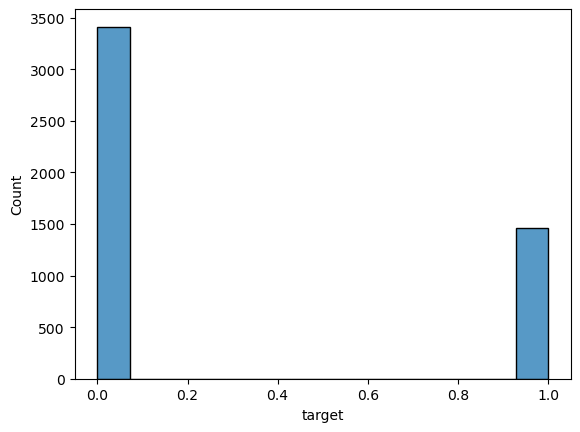

In [35]:
# plot a graph using histogram
sns.histplot(data=data, x="target")

In [139]:
#Separate features and target into X and Y
x = data[['monthly_income', 'origination_score_band', 'product', 'original_loan_amount',
          'original_loan_term', 'remaining_loan_term', 'delq_history']].values
x = x.reshape(-1,7)
x

array([[6.00e+03, 5.00e+00, 1.00e+00, ..., 2.40e+01, 5.00e+00, 0.00e+00],
       [3.90e+04, 5.00e+00, 1.00e+00, ..., 6.00e+01, 4.20e+01, 1.30e+01],
       [1.80e+04, 5.00e+00, 1.00e+00, ..., 6.00e+01, 4.60e+01, 6.00e+00],
       ...,
       [3.75e+03, 5.00e+00, 3.00e+00, ..., 6.00e+01, 6.50e+01, 0.00e+00],
       [9.75e+03, 7.00e+00, 3.00e+00, ..., 6.00e+01, 6.50e+01, 0.00e+00],
       [2.25e+03, 6.00e+00, 2.00e+00, ..., 3.60e+01, 3.50e+01, 0.00e+00]])

In [140]:
y =data['target'].values
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=40)

In [148]:
#splitting the test and train data
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=40)
# applying logisticsregression on our data

model=LogisticRegression()
model_fit=model.fit(X_train,y_train)
predict = model.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
income = int(input('Enter monthly_income: '))
score_band = int(input('Enter origination_score_band from 1 to 8: '))
loan_amount = int(input('Enter original_loan_amount: '))
loan_term = int(input('Enter original_loan_term: '))
loan_term = int(input('Enter remaining_loan_term: '))
delq_hist = int(input('Enter delq_history from 0 to 54: '))
product = int(input('Enter product from 0 to 3: '))




prediction = model.predict([(income, score_band, loan_amount, loan_term,loan_term, delq_hist, product)])
if prediction == 1:
    print("Rolled")
else:
    print("Not Rolled")

Enter monthly_income: 5000
Enter origination_score_band from 1 to 8: 2
Enter original_loan_amount: 1800
Enter original_loan_term: 24
Enter remaining_loan_term: 8
Enter delq_history from 0 to 54: 2
Enter product from 0 to 3: 1
Rolled


In [193]:
# prediction perfomance
print(model.intercept_)

[-0.00058195]


In [162]:
print(model.coef_)

[[-1.22889027e-05 -4.87739280e-04  5.52015910e-04 -6.88214670e-07
  -9.48373199e-03  1.71650728e-03 -1.03091584e-02]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [165]:
from sklearn.ensemble import RandomForestClassifier 

In [186]:
# Train a random forest classifier on the training data
clf = RandomForestClassifier(n_estimators = 100, criterion = "gini", min_samples_split=10, random_state = 40)
clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=10, random_state=40)

In [187]:
clf.feature_importances_

array([0.22159437, 0.12632334, 0.06395757, 0.07729636, 0.09446753,
       0.30656937, 0.10979146])

In [189]:
# Use the trained classifier to make predictions on the test data
predictions = clf.predict(X_test)

In [173]:
#Calculate the accuracy of the predictions
accuracy = (predictions ==y_test).mean()
print(f'Accuracy:{accuracy:.2f}')

Accuracy:0.99


In [192]:
confusion_matrix(y_test, predictions)

array([[1034,    5],
       [  19,  404]], dtype=int64)

In [190]:
accuracy_score(y_test,predictions) * 100

98.35841313269493

In [177]:
mean_squared_error(y_test,predict)

0.2893296853625171